In [2]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [4]:
analysis = scripts.Analysis()

In [5]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'o3',
                           'band05_wn_980_1100',
                           'P_50_T_250',
                           '1.e-20_UseAbsmean_wgts',
                           'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [6]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               '1.e-20_UseAbsmean_wgts',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1')
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [8]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_hrefanchor(s)
display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

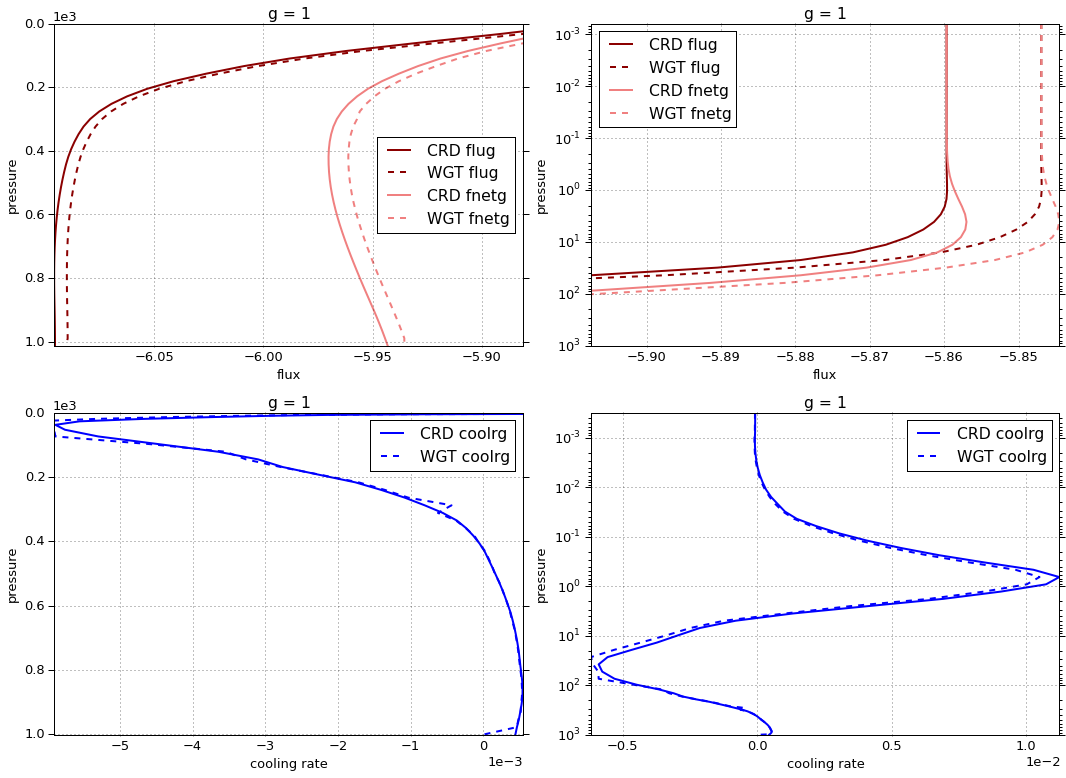

# Figure: flux, cooling rate. g-group 2

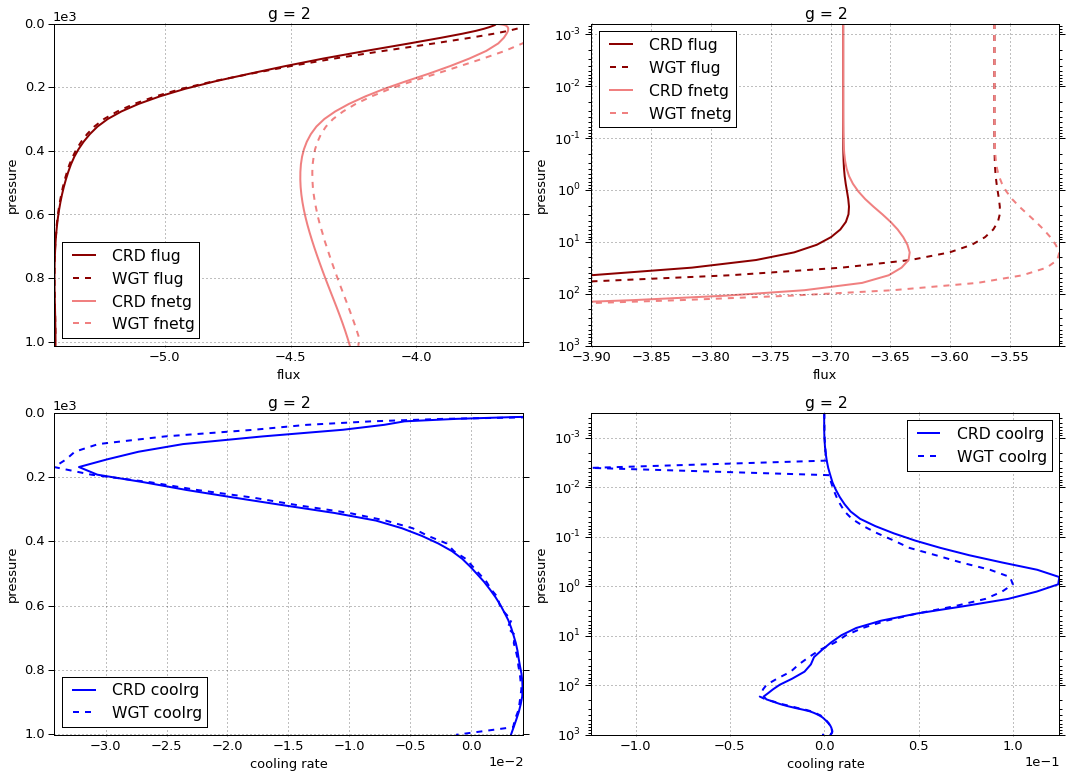

# Figure: flux, cooling rate. g-group 3

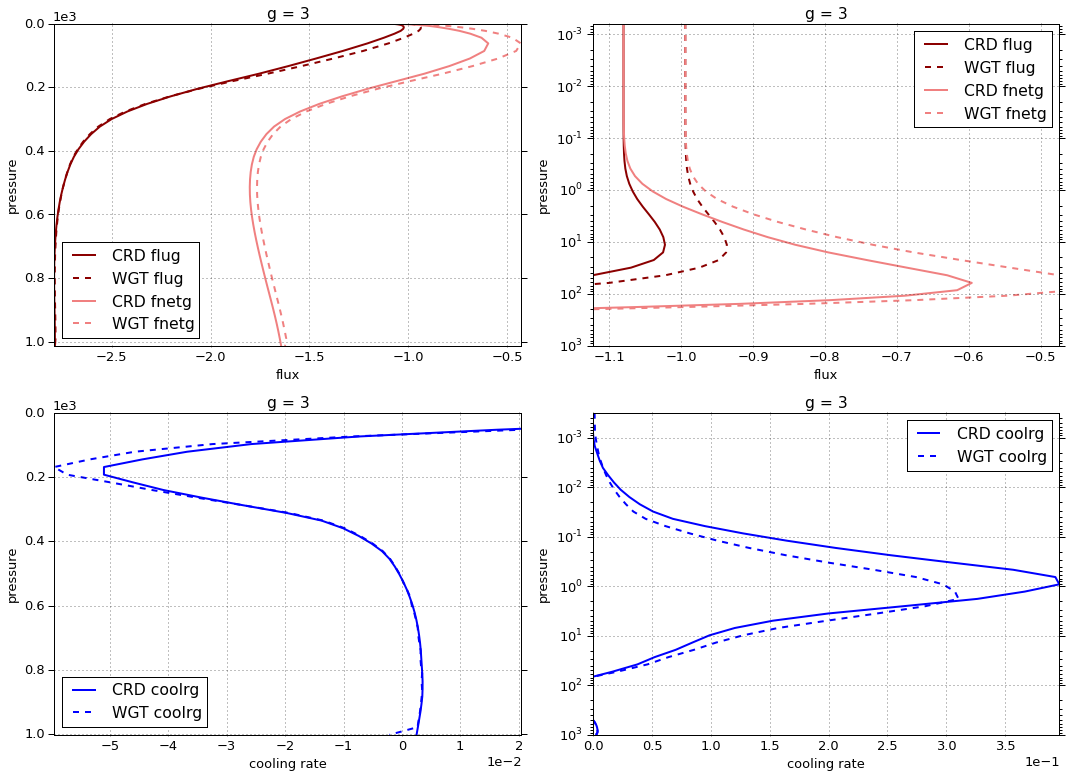

# Figure: flux, cooling rate. g-group 4

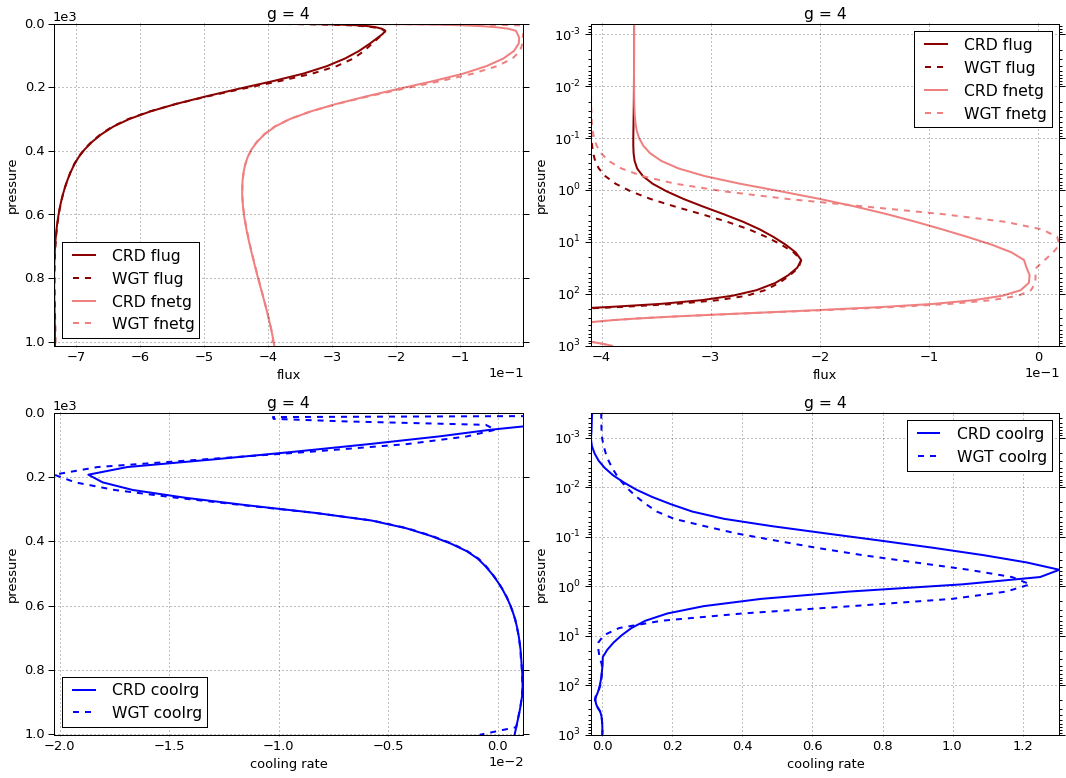

# Figure: flux, cooling rate. g-group total

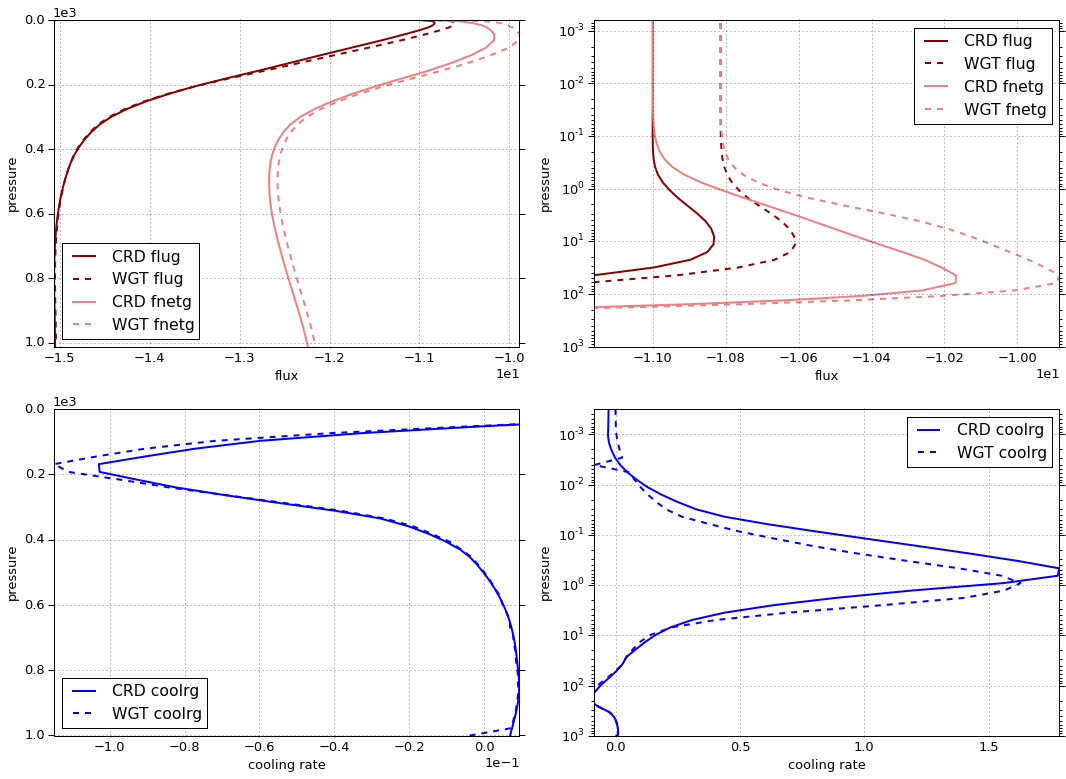

In [15]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [16]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.859674  0.000000 -5.859674
  1013     76    -6.095415  0.152283 -5.943132
2 0        1     -3.689539  0.000000 -3.689539
  1013     76    -5.435730  1.171549 -4.264181
3 0        1     -1.080498  0.000000 -1.080498
  1013     76    -2.787102  1.143894 -1.643208
4 0        1     -0.370193  0.000000 -0.370193
  1013     76    -0.733156  0.342809 -0.390347


WGT


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.846934  0.000000 -5.846934
  1013     76    -6.090241  0.154676 -5.935565
2 0        1     -3.562967  0.000000 -3.562967
  1013     76    -5.441195  1.210579 -4.230615
3 0        1     -0.994499  0.000000 -0.994499
  1013     76    -2.787122  1.163356 -1.623766
4 0        1     -0.409679  0.000000 -0.409679
  1013     76    -0.732845  0.338153 -0.394692


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.012740  0.000000  0.012740
  1013     76     0.005174  0.002393  0.007567
2 0        1      0.126573  0.000000  0.126573
  1013     76    -0.005465  0.039030  0.033566
3 0        1      0.085999  0.000000  0.085999
  1013     76    -0.000020  0.019462  0.019442
4 0        1     -0.039486  0.000000 -0.039486
  1013     76     0.000311 -0.004656 -0.004345

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000075
  1001.112500 75     0.000439
2 0.000312    1     -0.000134
  1001.112500 75     0.003245
3 0.000312    1     -0.000670
  1001.112500 75     0.002507
4 0.000312    1     -0.028338
  1001.112500 75     0.000772


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000084
  1001.112500 75    -0.000016
2 0.000312    1     -0.000012
  1001.112500 75    -0.001250
3 0.000312    1      0.000945
  1001.112500 75    -0.002137
4 0.000312    1     -0.002315
  1001.112500 75    -0.000818


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000008
  1001.112500 75    -0.000454
2 0.000312    1      0.000123
  1001.112500 75    -0.004495
3 0.000312    1      0.001615
  1001.112500 75    -0.004644
4 0.000312    1      0.026023
  1001.112500 75    -0.001589

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-10.999904,0.000000,-10.999904
1013,76,-15.051403,2.810535,-12.240868



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-10.814079,0.000000,-10.814079
1013,76,-15.051403,2.866765,-12.184638



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.858257e-01,0.00000,0.185826
1013,76,5.000000e-08,0.05623,0.056230


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.029217
1001.112500,75,0.006962



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.001465
1001.112500,75,-0.004220



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.027752
1001.112500,75,-0.011182


In [17]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.413000,0.404629
2,0.353833,0.361507
3,0.184333,0.185174
4,0.048833,0.048689


In [18]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=1).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      1     1 -5.859674  0.000000e+00 -5.859674   1     1 -5.846934   
0.000624      1     2 -5.859674  5.277206e-09 -5.859674   1     2 -5.846934   
0.000876      1     3 -5.859674  7.923581e-09 -5.859674   1     3 -5.846934   
0.001229      1     4 -5.859674  1.316403e-08 -5.859674   1     4 -5.846934   
0.001723      1     5 -5.859674  2.326648e-08 -5.859674   1     5 -5.846934   
0.002417      1     6 -5.859674  4.214327e-08 -5.859674   1     6 -5.846934   
0.003391      1     7 -5.859674  7.664204e-08 -5.859674   1     7 -5.846934   
0.004757      1     8 -5.859674  1.386245e-07 -5.859674   1     8 -5.846935   
0.006672      1     9 -5.859675  2.484970e-07 -5.859674   1     9 -5.846935   
0.009359      1    10 -5.859675  4.412320e-07 -5.859674   1    10 -5.846935   
0.013128      1    11 -5.859675  7.762882e-07 -5.859674   1    11 -5.846935   
0.018415      1    12 -5.859675  1.355099e-06 -5.859674   1    12 -5.846935   
0.025830      1    13 -5.859675  2.348407e-06 -5.859673   1    13 -5.846936   
0.036232      1    14 -5.859676  4.039791e-06 -5.859672   1    14 -5.846936   
0.050823      1    15 -5.859676  7.117410e-06 -5.859669   1    15 -5.846937   
0.071291      1    16 -5.859677  1.303876e-05 -5.859664   1    16 -5.846937   
0.100000      1    17 -5.859678  2.408032e-05 -5.859654   1    17 -5.846938   
0.140271      1    18 -5.859678  4.390550e-05 -5.859634   1    18 -5.846939   
0.196760      1    19 -5.859677  7.862451e-05 -5.859598   1    19 -5.846939   
0.275997      1    20 -5.859673  1.383309e-04 -5.859535   1    20 -5.846936   
0.387100      1    21 -5.859663  2.394886e-04 -5.859424   1    21 -5.846928   
0.543100      1    22 -5.859642  4.075795e-04 -5.859234   1    22 -5.846910   
0.761700      1    23 -5.859616  6.722513e-04 -5.858943   1    23 -5.846890   
1.068500      1    24 -5.859612  1.058607e-03 -5.858553   1    24 -5.846894   
1.498800      1    25 -5.859686  1.594370e-03 -5.858092   1    25 -5.846979   
2.102400      1    26 -5.859928  2.330085e-03 -5.857598   1    26 -5.847236   
2.949000      1    27 -5.860447  3.260127e-03 -5.857187   1    27 -5.847801   
4.136600      1    28 -5.861360  4.362061e-03 -5.856998   1    28 -5.848747   
5.802500      1    29 -5.862807  5.651071e-03 -5.857156   1    29 -5.850286   
8.139200      1    30 -5.864902  7.155693e-03 -5.857746   1    30 -5.852496   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    1    47 -6.082355  1.143671e-01 -5.967988   1    47 -6.076869   
347.300000    1    48 -6.084624  1.156088e-01 -5.969015   1    48 -6.079104   
371.075000    1    49 -6.086482  1.167996e-01 -5.969682   1    49 -6.080930   
394.850000    1    50 -6.088045  1.179754e-01 -5.970069   1    50 -6.082462   
418.625000    1    51 -6.089335  1.191135e-01 -5.970221   1    51 -6.083723   
442.400000    1    52 -6.090371  1.201911e-01 -5.970179   1    52 -6.084733   
466.175000    1    53 -6.091228  1.212325e-01 -5.969995   1    53 -6.085568   
489.950000    1    54 -6.091988  1.223198e-01 -5.969668   1    54 -6.086307   
513.725000    1    55 -6.092665  1.234614e-01 -5.969204   1    55 -6.086964   
537.500000    1    56 -6.093263  1.246594e-01 -5.968604   1    56 -6.087544   
561.275000    1    57 -6.093786  1.259079e-01 -5.967878   1    57 -6.088050   
585.050000    1    58 -6.094236  1.271975e-01 -5.967038   1    58 -6.088485   
608.825000    1    59 -6.094618  1.285257e-01 -5.966092   1    59 -6.088853   
632.600000    1    60 -6.094937  1.298930e-01 -5.965044   1    60 -6.089161   
656.375000    1    61 -6.095197  1.312822e-01 -5.963915   1    61 -6.089411   
680.150000    1    62 -6.095404  1.326910e-01 -5.962714   1    62 -6.089610   
703.925000    1    63 -6.095563  1.341123e-01 -5.961451   1   

In [19]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')